Check README for column name descriptions

Potential Questions:

1. Does number of league-wide HRs correlate with the 'steroid era'?
2. How often does the team with the best record win the WS?
3. Does total payroll correlate with win record?
4. Does

potentially useful: http://thomas-cokelaer.info/blog/2012/04/481/

In [148]:
# checkout some of the data (2015 data used here)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

batting_df = pd.read_csv('baseball/core/Batting.csv')

batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [34]:
batting_group_team_year = batting_df.groupby(['teamID', 'yearID'])

rbi_avg_by_team_and_year = batting_group_team_year.mean()['RBI']

In [35]:
print rbi_avg_by_team_and_year.head()

teamID  yearID
ALT     1884            NaN
ANA     1997      22.142857
        1998      19.447368
        1999      17.710526
        2000      18.600000
Name: RBI, dtype: float64


In [36]:
hr_max_by_team_and_year = batting_group_team_year.max()['HR']

In [37]:
print hr_max_by_team_and_year.describe()

count    2805.000000
mean       22.422103
std        13.041280
min         0.000000
25%        11.000000
50%        23.000000
75%        32.000000
max        73.000000
Name: HR, dtype: float64


In [38]:
print hr_max_by_team_and_year.iloc[73]

27.0


In [39]:
batting_df.shape # return size of dataset in cols, rows

(101332, 22)

In [40]:
batting_after_1985 = batting_df[batting_df.yearID >= 1985] # this filters by col contents!
# source: https://www.youtube.com/watch?v=2AFGPdNn4FM

In [41]:
hr_max_by_team_year_since_1985 = batting_after_1985.groupby(['teamID', 'yearID']).max()['HR']

In [42]:
hr_max_by_team_year_since_1985.describe()

count    888.000000
mean      31.453829
std        9.140893
min       11.000000
25%       25.000000
50%       31.000000
75%       37.000000
max       73.000000
Name: HR, dtype: float64

In [43]:
hr_max_by_team_year_since_1985.iloc[73]

15.0

In [44]:
hr_max_by_team_year_since_1985[15.0]

37.0

In [45]:
# look at max and average for each year and graph it
batting_group_year = batting_df.groupby(['yearID'])

In [46]:
max_HR_by_year = batting_group_year.max()['HR']

In [64]:
average_HR_by_year = batting_group_year.mean()['HR']
# maybe better to look at average of maxs (find max for each team by year, then take average)
max_HR_by_team_year = batting_group_team_year.max()['HR']

In [80]:
batting_group_year_team = batting_df.groupby(['yearID', 'teamID'])

In [83]:
max_HR_by_team_year = batting_group_year_team.max()['HR']

In [89]:
max_HR_by_team_year[1871].mean()

2.5555555555555554

In [99]:
def find_mean_by_series_index(series_name):
    start = 1871
    list_of_averages = []
    while start <= 2015:
        index_average = series_name[start].mean()
        start += 1
        list_of_averages.append(index_average)
    return list_of_averages
    
mean_max = find_mean_by_series_index(max_HR_by_team_year)
print mean_max

[2.5555555555555554, 1.3636363636363635, 1.7777777777777777, 2.0, 1.5384615384615385, 2.375, 1.8333333333333333, 2.0, 2.875, 3.375, 4.125, 4.428571428571429, 5.1875, 5.818181818181818, 6.25, 6.375, 10.375, 8.375, 11.4375, 7.44, 8.470588235294118, 8.25, 8.5, 11.916666666666666, 10.083333333333334, 7.916666666666667, 6.75, 7.25, 8.25, 8.375, 8.5625, 6.125, 6.5625, 5.5, 5.5625, 5.375, 4.9375, 5.25, 4.5625, 5.8125, 8.875, 7.9375, 7.9375, 8.875, 7.416666666666667, 6.9375, 6.0625, 5.1875, 9.0625, 13.25, 16.9375, 20.125, 18.875, 17.375, 18.875, 14.75, 17.6875, 18.5625, 23.5, 29.375, 20.0625, 23.875, 18.75, 25.0625, 22.6875, 23.9375, 24.625, 27.6875, 22.25, 25.8125, 22.3125, 18.5, 16.75, 18.5, 15.5625, 19.875, 24.875, 26.625, 25.5625, 29.3125, 27.6875, 24.8125, 29.75, 29.375, 32.25, 31.25, 30.6875, 31.625, 31.5625, 29.25, 32.166666666666664, 31.3, 27.0, 29.5, 26.35, 28.05, 27.3, 24.95, 31.0, 31.875, 27.833333333333332, 25.416666666666668, 26.583333333333332, 23.708333333333332, 24.875, 22.0, 2

In [65]:
average_max_HR_by_team_year = max_HR_by_team_year.mean()
print average_max_HR_by_team_year

22.4221033868


In [59]:
years = batting_df['yearID'].drop_duplicates()

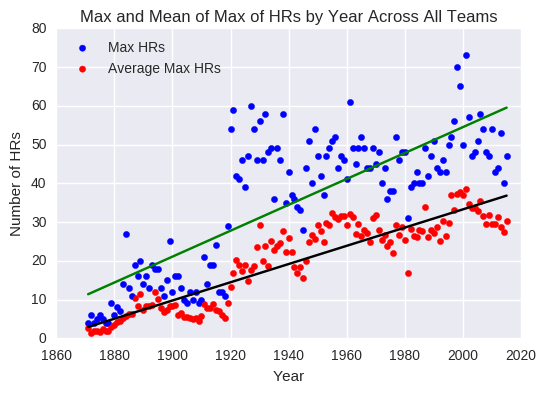

In [115]:
import seaborn as sns
%matplotlib inline

x = years
y = max_HR_by_year
z = mean_max

plt.scatter(x, y, color = 'blue', label='Max HRs')
plt.scatter(x, z, color = 'red', label='Average Max HRs')

plt.title('Max and Mean of Max of HRs by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.legend(loc='upper left')
plt.xlim(1860, 2020)
plt.ylim(0, 80)
# plt.xticks(10)

# add trendlines

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = 'b')
plt.plot(x, m*x + b, '-', color = 'g')

m, b = np.polyfit(x, z, 1)

plt.plot(x, z, '.', color = 'r')
plt.plot(x, m*x + b, '-', color = 'k')

## This figure shows maximum of number of homeruns (HR) hit league-wide for each year (blue). Compare this to the average of the maximum number by team for each year (i.e. find each team's max for each year and then average them by year, red). Both clearly show a steady increase over time.

# does the data differ between the two leagues since the DH was implemented (1973-present)? more specifically, have AL teams scored more runs than NL teams?
On February 2, 1876, the National League of Professional Baseball Clubs, which comes to be more commonly known as the National League (NL), is formed. The American League (AL) was established in 1901 and in 1903, the first World Series was held.

http://www.huffingtonpost.com/quora/what-are-the-major-eras-o_b_3547814.html

In [131]:
DH_implemented = 1973 # DH = designated hitter
batting_since_DH = batting_df[batting_df.yearID >= DH_implemented]

In [132]:
AL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'AL']

In [133]:
NL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'NL']

In [134]:
AL_batting_since_DH_tot_runs_by_year = AL_batting_since_DH.groupby('yearID').sum()['R']

In [149]:
AL_batting_since_DH_mean_runs_by_year = AL_batting_since_DH.groupby('yearID').mean()['R']

In [150]:
NL_batting_since_DH_tot_runs_by_year = NL_batting_since_DH.groupby('yearID').sum()['R']

In [151]:
NL_batting_since_DH_mean_runs_by_year = NL_batting_since_DH.groupby('yearID').mean()['R']

In [152]:
DH_years = batting_since_DH['yearID'].drop_duplicates()

(1970, 2020)

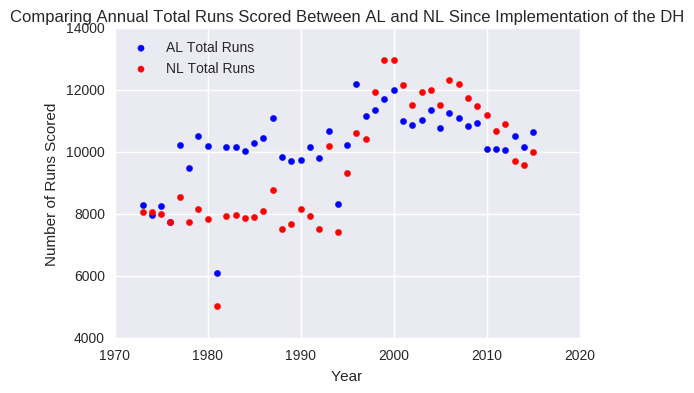

In [153]:
%matplotlib inline

x = DH_years
y1 = AL_batting_since_DH_tot_runs_by_year
y3 = NL_batting_since_DH_tot_runs_by_year

plt.scatter(x, y1, color = 'blue', label='AL Total Runs')
plt.scatter(x, y3, color = 'red', label='NL Total Runs')

plt.title('Comparing Annual Total Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper left')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

(1970, 2020)

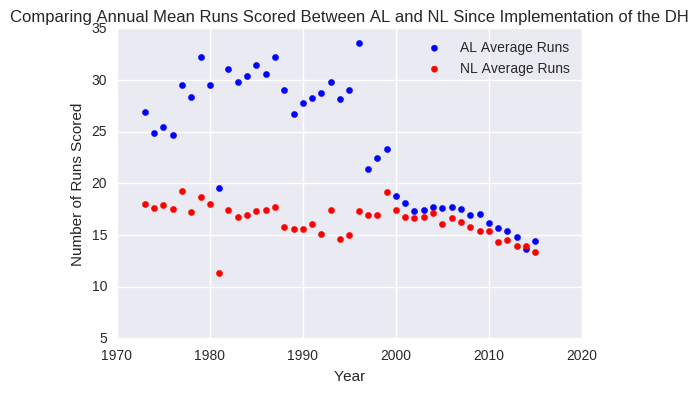

In [154]:
%matplotlib inline

x = DH_years
y2 = AL_batting_since_DH_mean_runs_by_year
y4 = NL_batting_since_DH_mean_runs_by_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Annual Mean Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

## are NL pitchers better hitters than AL pitchers? ('Pitchers Who Rake') **since DH**

In [163]:
# need to import position data from fielding table
fielding_df = pd.read_csv('baseball/core/Fielding.csv')

In [164]:
pitcher_fielding = fielding_df[fielding_df.POS == 'P']

In [165]:
pitcher_fielding_since_DH = pitcher_fielding[pitcher_fielding.yearID >= DH_implemented]

In [171]:
just_pitcher_pos_data = pitcher_fielding_since_DH.loc[:,['playerID', 'POS']]

In [178]:
# merge pitcher info with batting, retain only pitcher data
pitcher_batting_since_DH = just_pitcher_pos_data.merge(batting_since_DH, on = 'playerID', how = 'outer')

In [179]:
# probably best to look at H/AB or RBI/AB?
NL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'NL']

In [180]:
AL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'AL']

In [181]:
# hits per at bat
NL_hits_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'H'] / NL_pitcher_batting_since_DH.loc[:,'AB']

In [185]:
print NL_hits_per_at_bat.mean()

0.145188868259


In [186]:
AL_hits_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'H'] / AL_pitcher_batting_since_DH.loc[:,'AB']

In [187]:
print AL_hits_per_at_bat.mean()

0.165535217627


In [188]:
# HR per AB
NL_HR_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'HR'] / NL_pitcher_batting_since_DH.loc[:,'AB']

In [189]:
print NL_HR_per_at_bat.mean()

0.00601823980303


In [190]:
AL_HR_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'HR'] / AL_pitcher_batting_since_DH.loc[:,'AB']

In [191]:
print AL_HR_per_at_bat.mean()

0.0117126983227
